In [1]:
import sys
import os

# Get the parent directory (main repository directory)
parent_dir = os.path.abspath("..")
sys.path.append(parent_dir)

import sys
print(sys.path)

['/fs01/home/aditima/environment_project/SAT_SAM/example', '/pkgs/python-3.9.10/lib/python39.zip', '/pkgs/python-3.9.10/lib/python3.9', '/pkgs/python-3.9.10/lib/python3.9/lib-dynload', '', '/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages', '/fs01/home/aditima/environment_project/SAT_SAM']


In [2]:
from segmate.segmenter import ODISE
from segmate import utils
import numpy as np
import torch

In [3]:
sm = ODISE(device='cuda')

No module 'xformers'. Proceeding without it.
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


The checkpoint state_dict contains keys that are not used by the model:
  model_ema.{decay, num_updates}
backbone.feature_extractor.,category_head.clip.clip.,clip_head.clip.clip.


Finished Loading Model


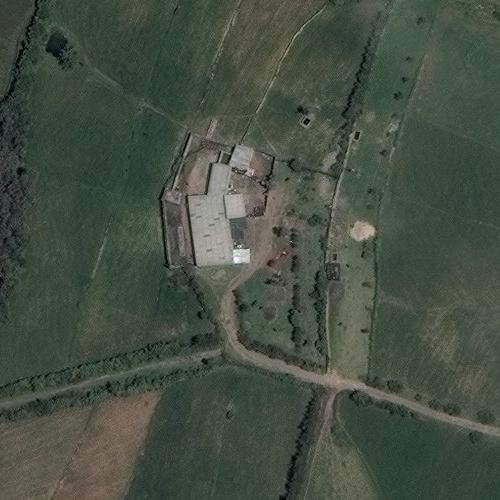

In [8]:
from PIL import Image

input_image = Image.open("./images/building.png")
input_image

/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from No

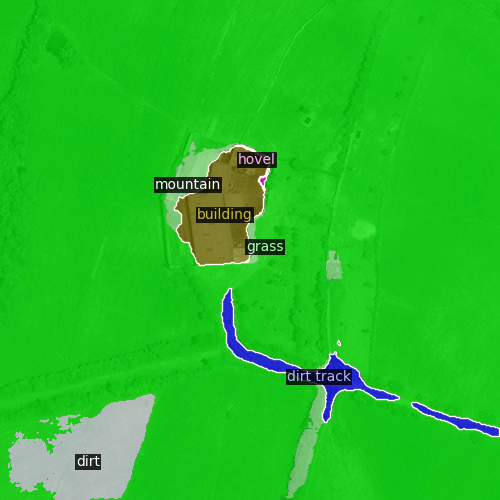

In [9]:
vocab = ""
label_list = ["COCO", "ADE"]
result = sm.segment(np.array(input_image), vocab, label_list)
result

In [10]:
utils.visualize_automask(image=np.array(input_image), masks=np.array(result), mask_only = False)

In [4]:
import requests
from PIL import Image

input_image = Image.open(requests.get("http://images.cocodataset.org/val2017/000000467848.jpg", stream=True).raw)
input_image

vocab: black pickup truck, pickup truck; blue sky, sky; small tiles
label_list: ['COCO', 'ADE', 'LVIS']


/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/scratch/ssd004/scratch/aditima/segmate/lib/python3.9/site-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from No

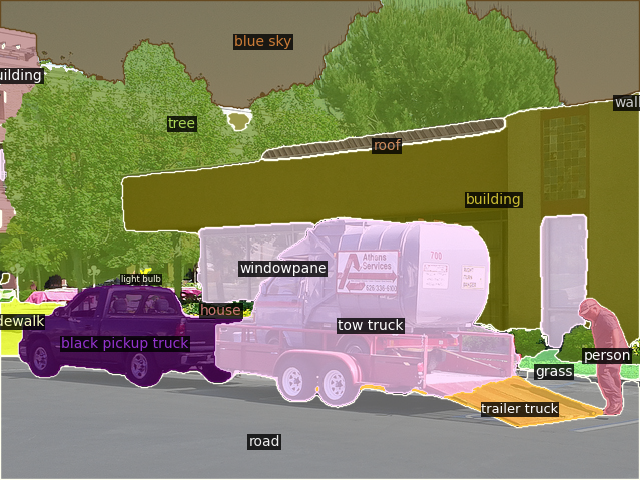

In [5]:
vocab = "black pickup truck, pickup truck; blue sky, sky; small tiles"
label_list = ["COCO", "ADE", "LVIS"]
result = sm.segment(np.array(input_image), vocab, label_list)
result